In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [2]:
data = pd.read_csv('Data/ex2data1.txt',delimiter=',',names=['exam 1 score','exam 2 score','Y'])
data.head()

,exam 1 score,exam 2 score,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = np.array(data.iloc[:,0:2])
Y = np.array(data.iloc[:,2:3])
#X = (X - np.mean(X))/(np.std(X))

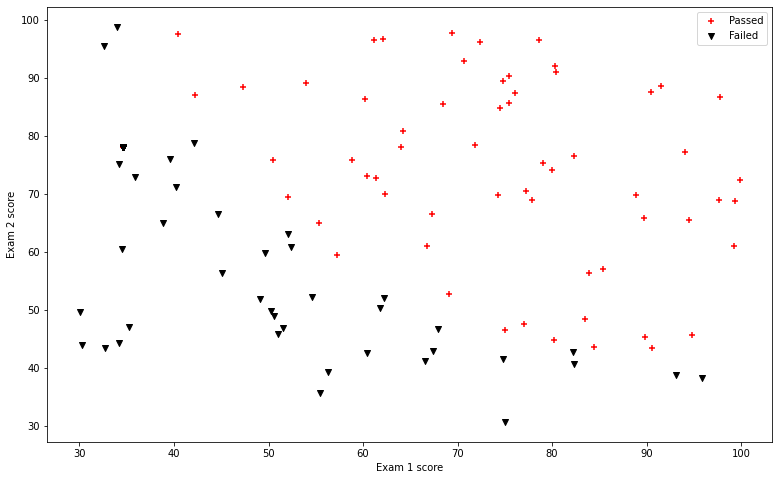

In [4]:
plt.figure(figsize=(13,8))
pos = np.argwhere(Y==1) # Returns indices of all points which have y==1
neg = np.argwhere(Y==0) #Returns indies of all points which have y==0

plt.scatter(X[pos, 0], X[pos, 1], marker='+', color='red')
plt.scatter(X[neg, 0], X[neg, 1], marker='v', color='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Passed', 'Failed'], loc='upper right', numpoints=1)
plt.show()

In [5]:
def sigmoid (z):
    g = 1/(1+np.exp(-z))
    return g.astype(float)

In [6]:
def costFunction(theta,x,y):
    hypothesis = sigmoid(np.dot(theta,x))
    m= y.size
    gradient = np.zeros([1,3])
    #Cost Function
    j = (1/m) * np.sum ( - np.dot(np.log(hypothesis), y) - np.dot(np.log(1-hypothesis), 1-y))
    
    grad0 = (1/m) * np.sum ((hypothesis - y.transpose()) * x[0,:] )
    grad1 = (1/m) * np.sum ((hypothesis - y.transpose()) * x[1,:] )
    grad2 = (1/m) * np.sum ((hypothesis - y.transpose()) * x[2,:] )
    gradient = np.array([grad0,grad1,grad2])
    
    return j,gradient

In [7]:
X_new = np.c_[np.ones(X.shape[0]),X].transpose()  
theta = np.zeros([1,3])

In [8]:
# To minimise our cost function we will use an inbuilt function fmin_tnc
# to give us the optimal parameters

result = opt.fmin_tnc(func=costFunction, x0=theta, args=(X_new, Y))
# x0 is the initial guess and args is the arguments that are being passed into the function 

optimal_theta = result[0]
cost_min,grad = costFunction(optimal_theta,X_new,Y)
print('Optimal theta:',optimal_theta)
print('Minimum cost:','%.5f'%cost_min)

Optimal theta: [-25.16131868   0.20623159   0.20147149]
Minimum cost: 0.20350


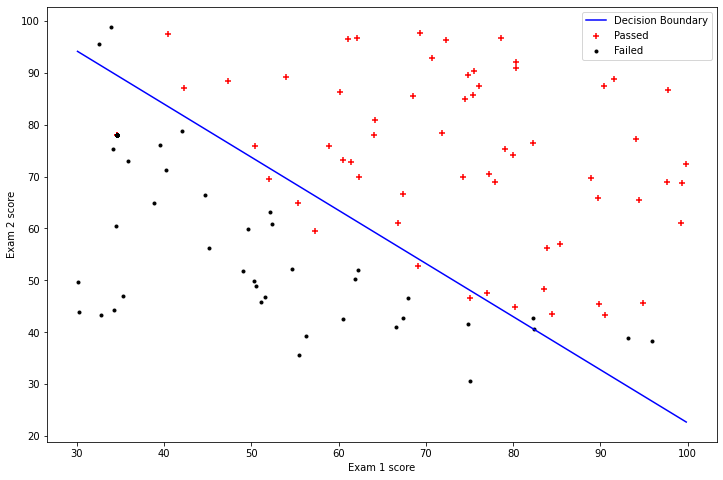

In [9]:
# Rearranging the Decision Boundary equation we can find the slope and intercept
slope = -optimal_theta[1]/optimal_theta[2]
intercept = -optimal_theta[0]/optimal_theta[2]
xx= np.array([min(X[:,0]),max(X[:,0])]);
f_line = slope*xx + intercept;

plt.figure(figsize=(12,8))
pos = np.argwhere(Y==1) 
neg = np.argwhere(Y==0) 

plt.scatter(X[pos, 0], X[pos, 1], marker='+', color='red')
plt.scatter(X[neg, 0], X[neg, 1], marker='.', color='black')
plt.plot(xx,f_line,color='blue');

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend([ 'Decision Boundary','Passed','Failed'], loc='upper right', numpoints=1)
plt.show()

In [10]:
def predict(theta,x):
    h= sigmoid(np.dot(theta,x))
    p= h>=0.5
    return p

In [11]:
print('Enter values for prediction')
x1 = float(input('Enter exam1 score'))
x2 = float(input('Enter exam2 score'))
x = np.array([1,x1,x2])
if predict(optimal_theta,x) == True:
    print('Passed:)')
else:
    print('Failed:(')

Enter values for prediction


Enter exam1 score 87
Enter exam2 score 98


Passed:)
